# Bear Detecting test app

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires pyqt5<5.13, which is not installed.
spyder 4.2.5 requires pyqtwebengine<5.13, which is not installed.
voila 0.2.10 requires nbconvert<7,>=6.0.0, but you have nbconvert 5.6.1 which is incompatible.
C:\Users\Bach\anaconda3\lib\site-packages\fastbook\__init__.py:18: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [5]:
path = Path('bears')

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [16]:
dls=bears.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [8]:
#dls.train.show_batch(max_n=4, nrows=1)

ValueError: This DataLoader does not contain any batches

In [11]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [10]:
!pip install pytorch

  Running setup.py clean for pytorch
Failed to build pytorch
    Running setup.py install for pytorch: started
    Running setup.py install for pytorch: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Bach\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Bach\\AppData\\Local\\Temp\\pip-install-3bu8vkk0\\pytorch_9fad8827dc1042f49440ee87f26cde60\\setup.py'"'"'; __file__='"'"'C:\\Users\\Bach\\AppData\\Local\\Temp\\pip-install-3bu8vkk0\\pytorch_9fad8827dc1042f49440ee87f26cde60\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Bach\AppData\Local\Temp\pip-wheel-if22g83p'
       cwd: C:\Users\Bach\AppData\Local\Temp\pip-install-3bu8vkk0\pytorch_9fad8827dc1042f49440ee87f26cde60\
  Complete output (5 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Users\Bach\AppData\Local\Temp\pip-install-3bu8vkk0\pytorch_9fad8827dc1042f49440ee87f26cde60\setup.py", line 15, in <module>
      raise

In [25]:
dls.train.items

[Path('bears/teddy/00000005.jpeg'),
 Path('bears/black/00000005.jpg'),
 Path('bears/grizzly/00000005.jpg'),
 Path('bears/grizzly/00000002.jpg'),
 Path('bears/black/00000008.jpg'),
 Path('bears/grizzly/00000000.jpg'),
 Path('bears/grizzly/00000007.jpg'),
 Path('bears/black/00000001.jpg'),
 Path('bears/black/00000004.jpg'),
 Path('bears/grizzly/00000009.jpg'),
 Path('bears/grizzly/00000001.jpg'),
 Path('bears/teddy/00000004.jpg'),
 Path('bears/grizzly/00000009-Copy1.jpg'),
 Path('bears/teddy/00000008.jpg'),
 Path('bears/black/00000006.jpg'),
 Path('bears/grizzly/00000006.jpg'),
 Path('bears/teddy/00000001.jpg'),
 Path('bears/teddy/00000006.jpg'),
 Path('bears/grizzly/00000001-Copy2.jpg'),
 Path('bears/teddy/00000002.jpg'),
 Path('bears/grizzly/00000001-Copy1.jpg')]

In [22]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

In [23]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,nan,0.666105,0.400000,00:00


epoch,train_loss,valid_loss,error_rate,time
0,nan,0.666105,0.400000,00:00
1,nan,0.666105,0.400000,00:00
2,nan,0.666105,0.400000,00:00
3,nan,0.666105,0.400000,00:00


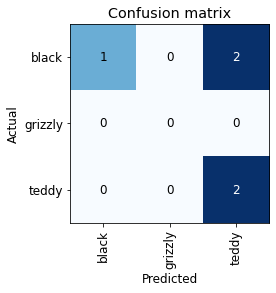

In [24]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [26]:
learn.export()

In [27]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [28]:
learn_inf = load_learner(path/'export.pkl')

In [29]:
learn_inf.predict('images/black.jpg')

('teddy', tensor(2), tensor([0.2885, 0.0028, 0.7087]))

In [30]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [46]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [47]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))

In [48]:
img = PILImage.create(btn_upload.data[-1])

In [49]:
pred,pred_idx,probs = learn_inf.predict(img)

In [50]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [33]:
btn_run = widgets.Button(description='Classify')

In [34]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [35]:
btn_upload = widgets.FileUpload()

In [51]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [52]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila 

  Using cached nbconvert-6.1.0-py3-none-any.whl (551 kB)
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires pyqt5<5.13, which is not installed.
spyder 4.2.5 requires pyqtwebengine<5.13, which is not installed.
nbdev 1.1.14 requires nbconvert<6, but you have nbconvert 6.1.0 which is incompatible.
Enabling: voila
- Writing config: C:\Users\Bach\anaconda3\etc\jupyter
    - Validating...
      voila 0.2.10 ok
